In [13]:
import numpy as np
import matplotlib.pyplot as plt

The temperature in the room $x_t$ is controlled by a heater. It changes the temperature according to the following rule: $0.1*cos(\alpha t)*u_t^2$. Unfortunately, it is malfunctioning and the controls $u_{t,real} = {u}_t + \eta_t$ it exerts are slightly off where $\eta_t \sim \mathcal{N}(0, M)$. Likewise, the temperature deviates from time to time due to the presence of air flows that is modelled by the noise $\epsilon_t \sim \mathcal{N}(0, N)$. The estimated temperature at the moment of time $t$ can be written as follows:

$$x_t = g(x_{t-1}, u_t) = x_{t-1} + \Delta t * 0.1 * cos(\alpha t) * u_t^2 + \epsilon_t$$

Let $\alpha=0.1$, $x_0 = 18$, $\Sigma_0=0$, $\Delta t=0.3$, $M=3$ and $N=0.2$.

In [14]:
alpha = 0.1

x_0 = 18
sigma_0 = 0

dt = 0.3

n = 400

M = 3
R = 0.2

In [15]:
np.random.seed(904)

t = np.arange(n)

# Commands that were intended to be executed: u_bar
u = np.random.randint(1, 4, (len(t) - 1)).astype(np.float32)
# Actual executed commands: u_bar + eta
u_real = u + np.random.randn(len(t) - 1) * np.sqrt(M)

In [16]:
# Actual temperature
x = [x_0]

for t_t, u_t in zip(t[1:], u_real):
    x_t = x[-1] + dt * 0.1 * np.cos(alpha * t_t) * u_t**2
    x.append(x_t)

x = np.array(x)

## Task 1
Calculate $G_t=\frac{dg(x_{t-1}, u_t)}{dx_{t-1}}\Big|_{\mu_{t-1}}$ and $V_t=\frac{dg(x_{t-1}, u_t)}{du_{t}}\Big|_{{u}_t,\,\eta = 0}$ and perform mean and covariance propagation. Plot the guess on mean values and covariance estimates as 1-sigma interval for each step.

In [17]:
mean_x = [x_0]
cov_x = [sigma_0]

$\Sigma_x = \Sigma_{x-1} + V M V^T$

In [18]:
# TODO. Your code here
mean_x = [x_0]
cov_x = [sigma_0]
for t_t, u_t in zip(t[1:], u):
    g_t = 1
    v_t = dt * 0.1 * np.cos(alpha * t_t) * 2 * u_t
    mean_x.append(mean_x[-1]+ dt * 0.1 * np.cos(alpha * t_t) * u_t**2)
    cov_x.append(cov_x[-1]+ v_t**2 * M)
# mean_x = 
sigma1_x = np.sqrt(cov_x)

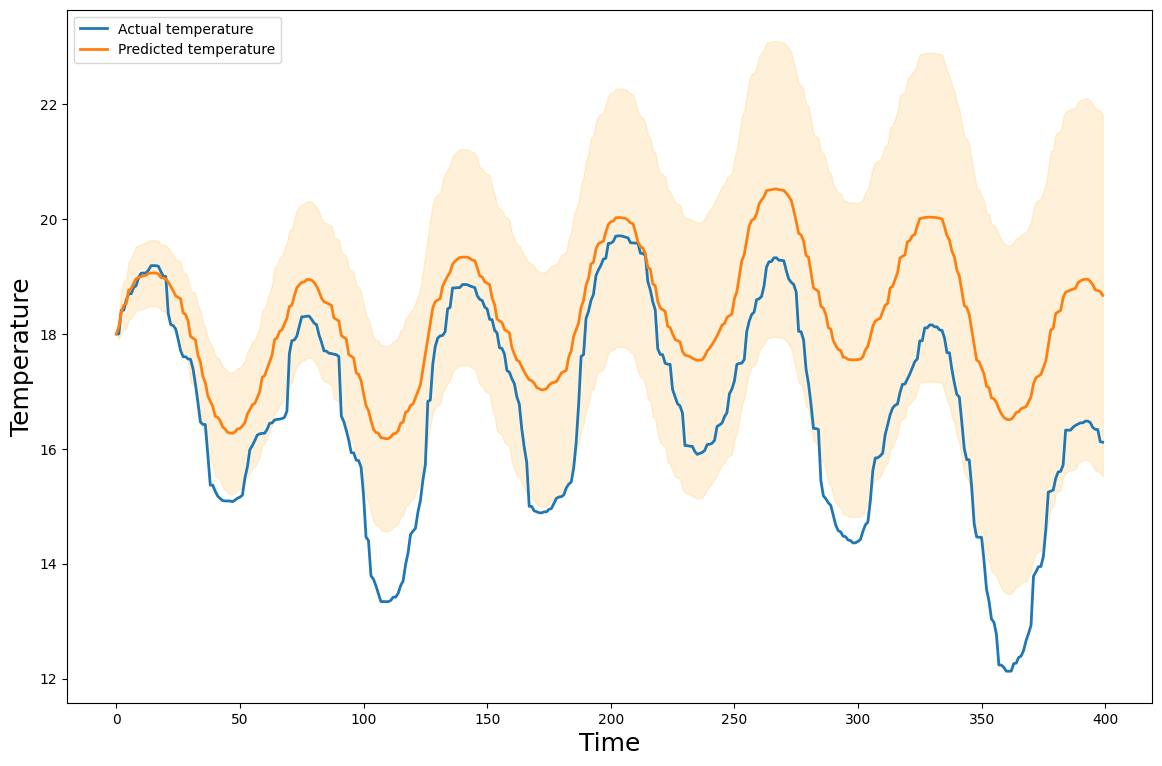

In [19]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, x, linewidth=2, label='Actual temperature')
ax.plot(t, mean_x, linewidth=2, label='Predicted temperature')
ax.fill_between(t, (mean_x - sigma1_x), (mean_x + sigma1_x), color='orange', alpha=.15)

plt.legend()

Now, lets assume that we can measure the temperature in the room by using a sensor. The sensor procudes the following observation $z_t = h(x_t) = 2\sqrt{x_t} + \nu_t$ where $\nu \sim \mathcal{N}(0, R)$ and $R = 0.1$.

In [ ]:
np.random.seed(1)

Q = 0.1

z_noise = np.random.randn(len(t) - 1) * np.sqrt(R)
z = 2 * np.sqrt(x[1:]) + z_noise

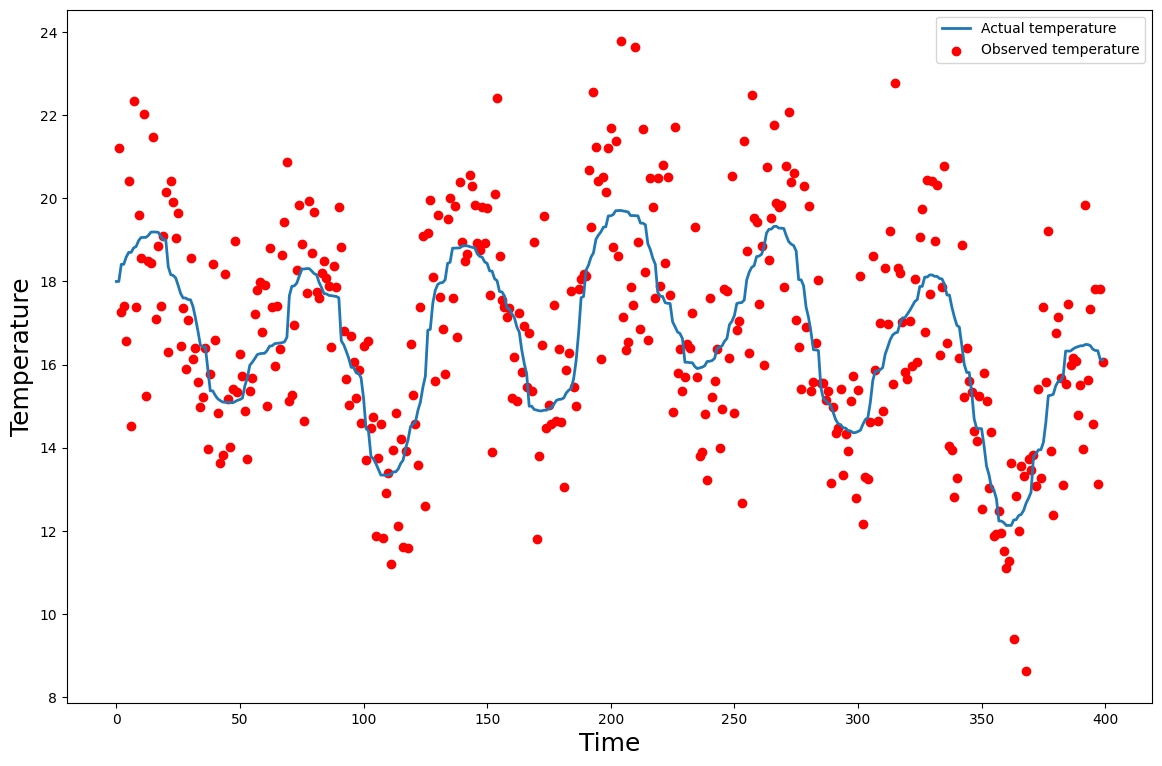

In [21]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, x, linewidth=2, label='Actual temperature')
ax.scatter(t[1:], z ** 2 / 4, color='red', label='Observed temperature')

plt.legend()


## Task 2

Calculate $H_t=\frac{dh(x_t)}{dx_t}\Big|_{\mu_t}$ and using the implementation of prediction step from the previous taks finish the implementation of EKF by implementing the update step. Plot mean and covariance 1-sigma and 3-sigma intervals outputed by the algorithm on each step.

In [22]:
mean_x = [x_0]
cov_x = [sigma_0]

In [23]:
mean_x = [x_0]
cov_x = [sigma_0]
for t_t, u_t,z_t in zip(t[1:], u,z):
    g_t = 1
    v_t = dt * 0.1 * np.cos(alpha * t_t) * 2 * u_t
    mean_predicted = mean_x[-1]+ dt * 0.1 * np.cos(alpha * t_t) * u_t**2
    cov_predicted = cov_x[-1]+ v_t**2 * M
    h_t = 1/(np.sqrt(mean_predicted))
    k_t = cov_predicted * h_t *(h_t * cov_predicted * h_t + Q)**(-1)
    mean_x.append(mean_predicted + k_t * (z_t - 2* np.sqrt(mean_predicted)))
    cov_x.append((1-k_t* h_t)*cov_predicted)

sigma1_x = np.sqrt(cov_x)

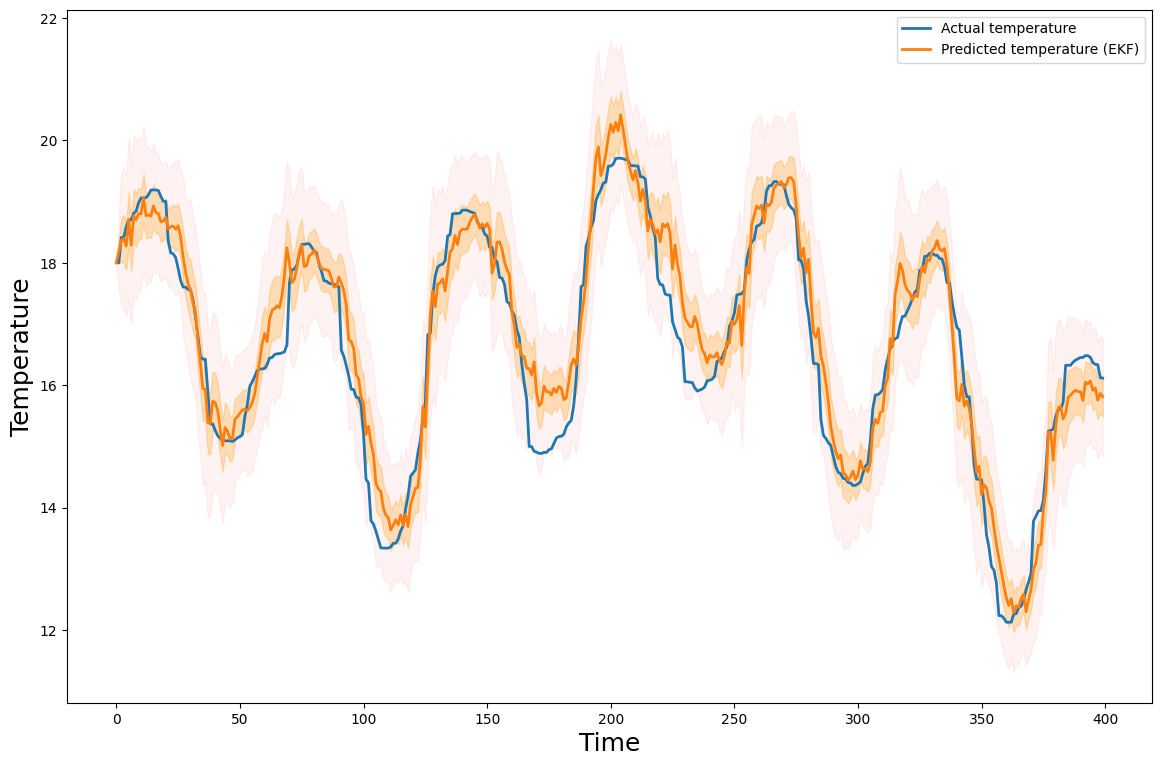

In [24]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)

ax.plot(t, x, linewidth=2, label='Actual temperature')
ax.plot(t, mean_x, linewidth=2, label='Predicted temperature (EKF)')
ax.fill_between(t, (mean_x - sigma1_x), (mean_x + sigma1_x), color='orange', alpha=.25)
ax.fill_between(t, (mean_x - 3 * sigma1_x), (mean_x + 3 * sigma1_x), color='red', alpha=.05)

plt.legend()